# Método de Runge Kutta -  Aula 29/09

In [1]:
import numpy as np
import csv
import pandas as pd

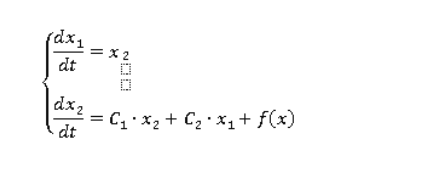

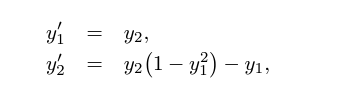

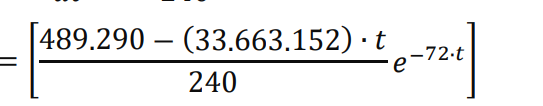

In [31]:
# #Derivada
def f(x,y): 
    df1 = y[1]
    df2 = y[1]*(1-y[0]**2)-y[0]
    return df1, df2 

In [25]:
# #Derivada
def f(x,y): 
    df1 = y[1]
    df2 = 0*y[1]+1/3*y[0]+ ((489.290 - (33663.152)*y[0])/240)*np.exp(-72*y[0])
    return df1, df2 

## Euler

In [32]:
def euler(f, x, y0, h):
    
    y = np.zeros((len(x), len(y0)))
    f1 = np.zeros((len(x), len(y0)))
    y[0] = y0

    for i in np.arange(0, len(x)-1):
        f1[i] = f(x[i], y[i])
        y[i+1] = y[i] + f1[i] * h
                
    return y           

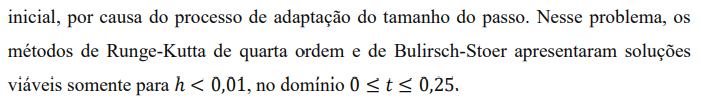

In [33]:
#domínios
a  = 0
b  = 2
y0 = [0,0.25]  #PVI confição inicial
h  = 0.001  #intervalo (delta) h=(b-a)/100

In [34]:
x = np.arange(a, b, h) #ou t
len(x)

2000

In [35]:
E = euler(f, x, y0, h)
print (f'Solução Euler: {E}')
# len(E)

Solução Euler: [[0.00000000e+00 2.50000000e-01]
 [2.50000000e-04 2.50250000e-01]
 [5.00250000e-04 2.50500000e-01]
 ...
 [6.87814248e-01 1.18714754e-01]
 [6.87932963e-01 1.18089492e-01]
 [6.88051052e-01 1.17463762e-01]]


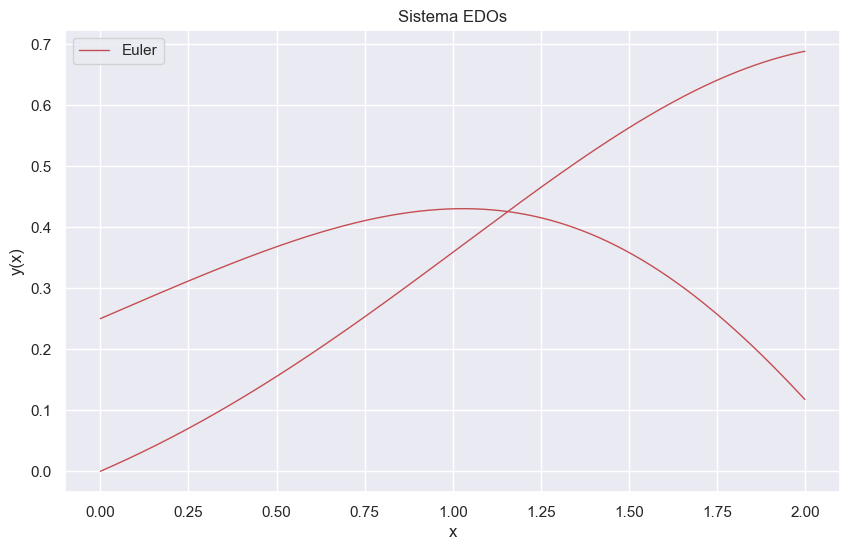

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
# plt.plot(x, F, 'r--', linewidth = 1, label = 'Range Kutta')
# plt.plot(x, , 'b--', linewidth = 1, label = "Analítica")
plt.plot(x, E, 'r', linewidth = 1, label = "Euler")
plt.title('Sistema EDOs')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend(['Euler'])
plt.grid(True)
plt.show()

# Runge-kutta

In [9]:

def range_kutta(f, x, y0, h):
    y = np.zeros((len(x), len(y0)))
    k1 = np.zeros((len(x), len(y0)))
    k2 = np.zeros((len(x), len(y0)))
    k3 = np.zeros((len(x), len(y0)))
    k4 = np.zeros((len(x), len(y0)))
    y[0] = y0
    
    for i in np.arange(0, len(x)-1):
                  
        k1[i] = f(x[i],y[i])
        k2[i] = f(x[i] + (h/2), y[i] + (h/2) * k1[i])
        k3[i] = f(x[i] + h, y[i] + h * k2[i])
        k4[i] = f(x[i] + h, y[i] + h * k3[i])
            
        y[i+1] = y[i] + (h/6) * (k1[i] + 2 * k2[i] + 2 * k3[i] + k4[i])

                
    return y   

In [10]:
R = range_kutta(f, x, y0, h)
#print (f'Solução Range Kutta: {R}')

In [11]:
df1 = R[:,0]

In [12]:
df2 = R[:,1]

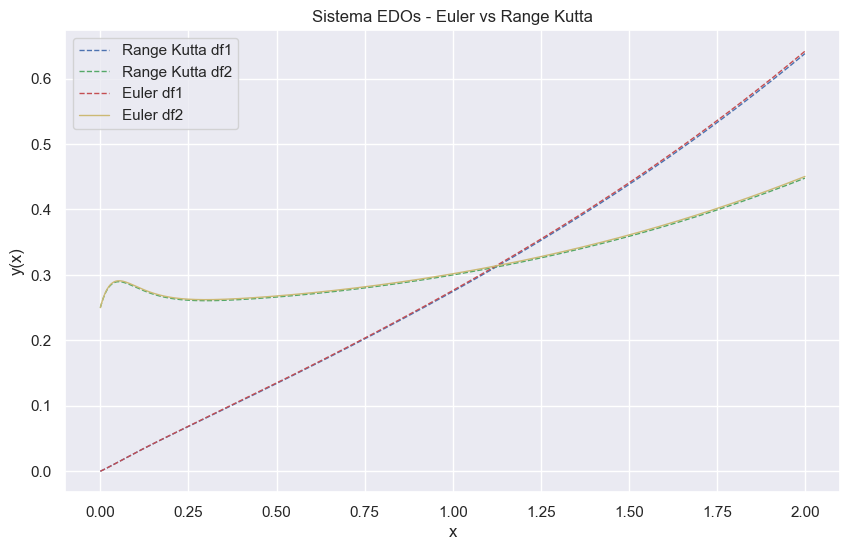

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(font_scale = 1, font='sans serif')
plt.figure(figsize=(10,6), facecolor = "#FFF")

plt.figure(1)
plt.rcParams.update({'font.size': 10})
# plt.plot(x, E, 'r', linewidth = 1, label = "Euler")
plt.plot(x, R[:,0], 'b--', linewidth = 1, label = 'Range Kutta df1')
plt.plot(x, R[:,1], 'g--', linewidth = 1, label = 'Range Kutta df2')
# plt.plot(x, df2, 'r--', linewidth = 1, label = 'Range Kutta')
plt.plot(x, E[:,0], 'r--', linewidth = 1, label = 'Euler df1')
plt.plot(x, E[:,1], 'y', linewidth = 1, label = 'Euler df2')

plt.title('Sistema EDOs - Euler vs Range Kutta')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.legend()
plt.grid(True)
plt.show()